In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('processedheartdata.csv')
df.head()

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,chest pain type,resting bp s,hypertension,...,resting heart rate,peak exercise bp 1,peak exercise bp 2,resting bp d,exercise angina,xhypo,oldpeak,ST height at rest,ST heaight at peak,target
0,1254,0,40,1,1,0,0.0,2,140.0,0.0,...,86.0,200.0,110.0,86.0,0.0,0.0,0.0,26.0,20.0,0
1,1255,0,49,0,1,0,0.0,3,160.0,1.0,...,100.0,220.0,106.0,90.0,0.0,0.0,1.0,14.0,13.0,1
2,1256,0,37,1,1,0,0.0,2,130.0,0.0,...,58.0,180.0,100.0,80.0,0.0,0.0,0.0,17.0,14.0,0
3,1257,0,48,0,1,1,1.0,4,138.0,0.0,...,54.0,210.0,106.0,86.0,1.0,0.0,1.5,19.0,22.0,3
4,1258,0,54,1,1,0,1.0,3,150.0,0.0,...,74.0,130.0,100.0,90.0,0.0,1.0,0.0,13.0,9.0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,617.0,1325.489465,1294.916561,1.0,157.0,1120.000000,1282.000000,5002.0
ccf,617.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
age,617.0,53.055105,9.582869,28.0,47.0,54.000000,60.000000,77.0
sex,617.0,0.842788,0.364296,0.0,1.0,1.000000,1.000000,1.0
pain location,617.0,0.920583,0.270607,0.0,1.0,1.000000,1.000000,1.0
pain w exertion,617.0,0.593193,0.491637,0.0,0.0,1.000000,1.000000,1.0
relieved after rest,617.0,0.674230,0.469042,0.0,0.0,1.000000,1.000000,1.0
chest pain type,617.0,3.294976,0.913743,1.0,3.0,4.000000,4.000000,4.0
resting bp s,617.0,132.372760,18.854642,0.0,120.0,130.000000,140.000000,200.0
hypertension,617.0,0.385737,0.487164,0.0,0.0,0.000000,1.000000,1.0


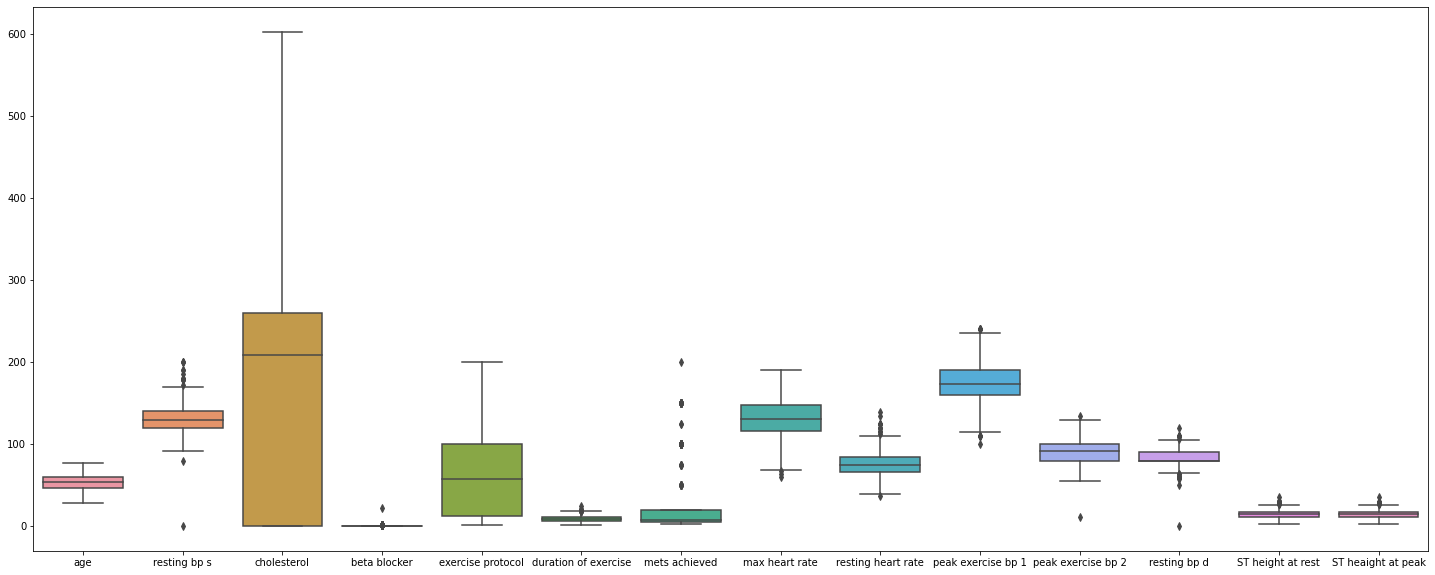

In [4]:
plt.figure(figsize = (25,10))
sns.boxplot(data = df[['age', 'resting bp s','cholesterol','beta blocker','exercise protocol' , 'duration of exercise',\
                       'mets achieved','max heart rate','resting heart rate','peak exercise bp 1','peak exercise bp 2', \
                       'resting bp d','ST height at rest','ST heaight at peak']])

In [5]:
column = ['age', 'resting bp s','cholesterol','beta blocker','exercise protocol' , 'duration of exercise',\
                       'mets achieved','max heart rate','resting heart rate','peak exercise bp 1','peak exercise bp 2', \
                       'resting bp d','ST height at rest','ST heaight at peak']

In [6]:
# Removing outliers
for c in column:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3-Q1
    for i in range(df.shape[0]):
        if df.loc[i,c] < Q1 - 1.5*IQR or df.loc[i,c] > Q3 + 1.5*IQR:
            df.loc[i,c] = df[c].mean()

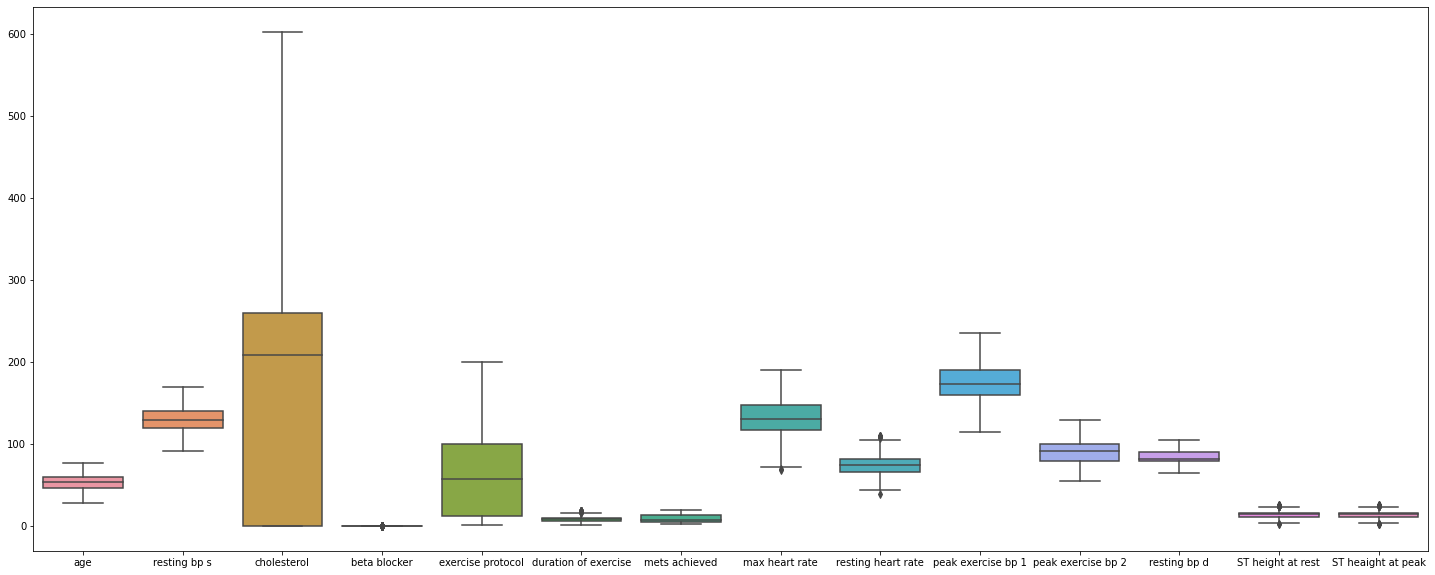

In [7]:
plt.figure(figsize = (25,10))
sns.boxplot(data = df[column])

In [8]:
#df.to_csv('processedheartdata.csv', index = None)

# adding more eda soon